In [28]:
#Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import easygui
import pytesseract

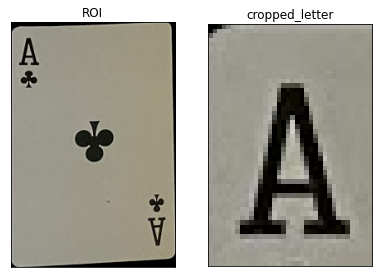

The card is:  Ace


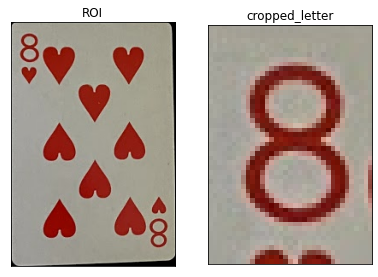

The card is:  8


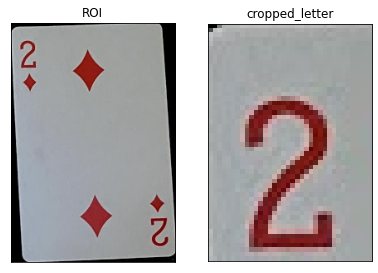

The card is:  2


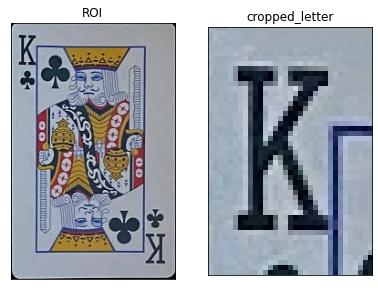

The card is:  King


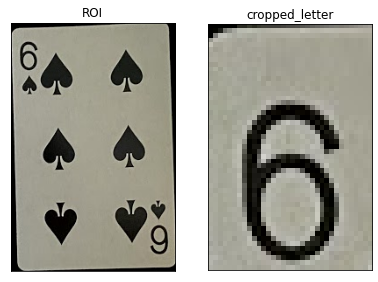

The card is:  6


In [58]:
def GetLetter(croppedLetter):
    #Gets a threshold
    thresh = cv2.threshold(croppedLetter, 100, 255, cv2.THRESH_BINARY_INV)[1]
    #Blurs it with threshold
    imBlur = cv2.GaussianBlur(thresh, (5,5), 0)
    imBlur = 255 - imBlur#Invert

    key = cv2.waitKey(0)
    #convert to text from section of image
    textFromImage = pytesseract.image_to_string(imBlur, lang='eng',config='--psm 6')
    
    
    if(len(textFromImage) < 2):
        singleChar = textFromImage
    else:
        singleChar = textFromImage[0]
        #print(len(textFromImage),"characters detected: "+textFromImage+"    using char:"+singleChar)
        
    cardType = ""
    
    if(singleChar == "K"):
        cardType = "King"
    elif(singleChar == "Q"):
        cardType = "Queen"
    elif(singleChar == "J"):
        cardType = "Jack"
    elif(singleChar == "A"):
        cardType = "Ace"
    else:#is number
        cardType = singleChar
        
    
    return cardType



img = cv2.imread("blackcard1.jpg")
G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
T = 120
T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)

#inverse = cv2.bitwise_not(B)
C,_ = cv2.findContours(B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
C = sorted(C, key=cv2.contourArea, reverse=True)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
i = 0

while i < 5:
    largestContour = C[i]
    x,y,w,h = cv2.boundingRect(largestContour)

    ROI = img[y:y+h,x:x+w]
    H,W,Channels = ROI.shape

    cropped_letter = ROI[6:int(H * 0.2), 3:int(W * 0.2)]
    
    cardLetter = GetLetter(cropped_letter)
    
    
    
    plt.figure(2, figsize=(10,5)) #plots each clicked cell beside the isolated version so it can be looked back over
    
    p1 = plt.subplot(131)
    p1.set_title("ROI")
    plt.imshow(ROI, cmap='gray'), plt.xticks([]),plt.yticks([])

    p2 = plt.subplot(132)
    p2.set_title("cropped_letter")
    plt.imshow(cropped_letter, cmap='gray'), plt.xticks([]),plt.yticks([])
    plt.show()
    
    print("The card is: ",cardLetter)

    i = i + 1





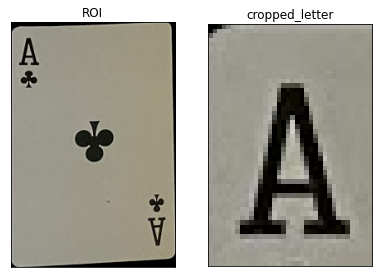

The card is:  Ace


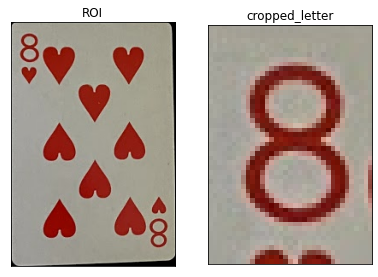

The card is:  8


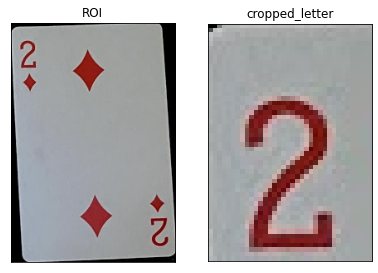

The card is:  2


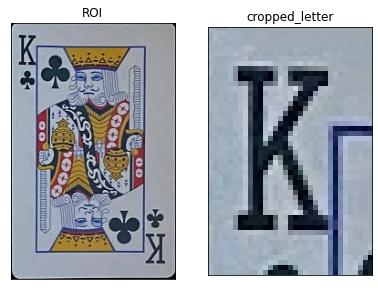

The card is:  King


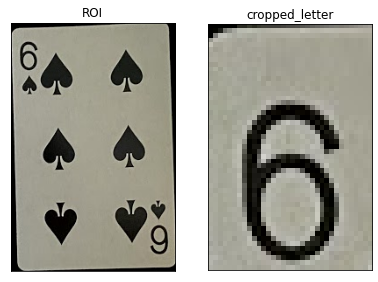

The card is:  6


In [58]:
def GetLetter(croppedLetter):
    #Gets a threshold
    thresh = cv2.threshold(croppedLetter, 100, 255, cv2.THRESH_BINARY_INV)[1]
    #Blurs it with threshold
    imBlur = cv2.GaussianBlur(thresh, (5,5), 0)
    imBlur = 255 - imBlur#Invert

    key = cv2.waitKey(0)
    #convert to text from section of image
    textFromImage = pytesseract.image_to_string(imBlur, lang='eng',config='--psm 6')
    
    
    if(len(textFromImage) < 2):
        singleChar = textFromImage
    else:
        singleChar = textFromImage[0]
        #print(len(textFromImage),"characters detected: "+textFromImage+"    using char:"+singleChar)
        
    cardType = ""
    
    if(singleChar == "K"):
        cardType = "King"
    elif(singleChar == "Q"):
        cardType = "Queen"
    elif(singleChar == "J"):
        cardType = "Jack"
    elif(singleChar == "A"):
        cardType = "Ace"
    else:#is number
        cardType = singleChar
        
    
    return cardType



img = cv2.imread("blackcard1.jpg")
G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
T = 120
T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)

#inverse = cv2.bitwise_not(B)
C,_ = cv2.findContours(B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
C = sorted(C, key=cv2.contourArea, reverse=True)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
i = 0

while i < 5:
    largestContour = C[i]
    x,y,w,h = cv2.boundingRect(largestContour)

    ROI = img[y:y+h,x:x+w]
    H,W,Channels = ROI.shape

    cropped_letter = ROI[6:int(H * 0.2), 3:int(W * 0.2)]
    
    cardLetter = GetLetter(cropped_letter)
    
    
    
    plt.figure(2, figsize=(10,5)) #plots each clicked cell beside the isolated version so it can be looked back over
    
    p1 = plt.subplot(131)
    p1.set_title("ROI")
    plt.imshow(ROI, cmap='gray'), plt.xticks([]),plt.yticks([])

    p2 = plt.subplot(132)
    p2.set_title("cropped_letter")
    plt.imshow(cropped_letter, cmap='gray'), plt.xticks([]),plt.yticks([])
    plt.show()
    
    print("The card is: ",cardLetter)

    i = i + 1





3 characters detected: 2
    using char:2


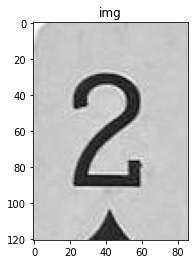

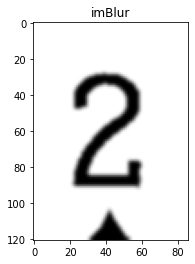

The card is:  2
4 characters detected: 6,
    using char:6


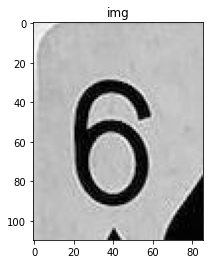

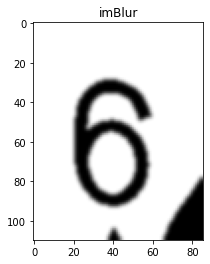

The card is:  6
4 characters detected: Bi
    using char:B


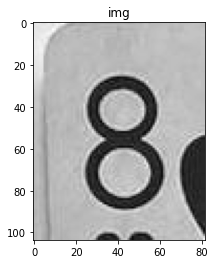

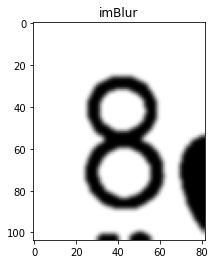

The card is:  B
3 characters detected: A
    using char:A


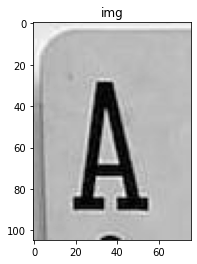

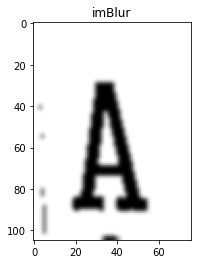

The card is:  Ace
4 characters detected: Ki
    using char:K


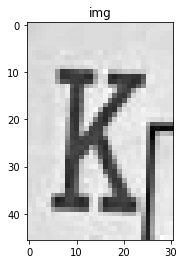

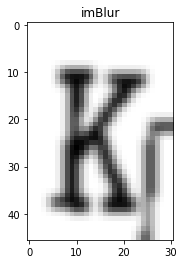

The card is:  King


In [23]:
import pytesseract

def GetLetter(img):
    #Gets a threshold
    thresh = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)[1]
    #Blurs it with threshold
    imBlur = cv2.GaussianBlur(thresh, (5,5), 0)
    imBlur = 255 - imBlur#Invert

    key = cv2.waitKey(0)
    #convert to text from section of image
    textFromImage = pytesseract.image_to_string(imBlur, lang='eng',config='--psm 6')
    
    
    if(len(textFromImage) < 2):
        singleChar = textFromImage
    else:
        singleChar = textFromImage[0]
        print(len(textFromImage),"characters detected: "+textFromImage+"    using char:"+singleChar)
        
    cardType = ""
    
    if(singleChar == "K"):
        cardType = "King"
    elif(singleChar == "Q"):
        cardType = "Queen"
    elif(singleChar == "J"):
        cardType = "Jack"
    elif(singleChar == "A"):
        cardType = "Ace"
    else:#is number
        cardType = singleChar
    
    plt.imshow(img, cmap='gray')
    plt.title('img')
    plt.show()
    plt.imshow(imBlur, cmap='gray')
    plt.title('imBlur')
    plt.show()
    
    return cardType
    
    
    
#Path to your Tesseract-OCR
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

#Imput takes small section of top corner of card
image = cv2.imread('2Test.jpg',0)
cardLetter = GetLetter(image)
print("The card is: ",cardLetter)
image = cv2.imread('6Test.jpg',0)
cardLetter = GetLetter(image)
print("The card is: ",cardLetter)
image = cv2.imread('8Test.jpg',0)
cardLetter = GetLetter(image)
print("The card is: ",cardLetter)
image = cv2.imread('ATest.jpg',0)
cardLetter = GetLetter(image)
print("The card is: ",cardLetter)
image = cv2.imread('sampleLetter.png',0)
cardLetter = GetLetter(image)
print("The card is: ",cardLetter)

    

The card is:  oe
LAV



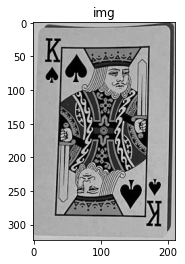

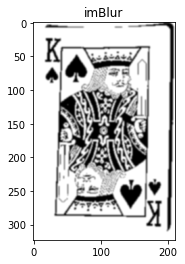

In [14]:
import pytesseract

def GetLetter(img):
    #Gets a threshold
    thresh = cv2.threshold(image, 80, 255, cv2.THRESH_BINARY_INV)[1]
    #Blurs it with threshold
    imBlur = cv2.GaussianBlur(thresh, (5,5), 0)
    imBlur = 255 - imBlur#Invert

    key = cv2.waitKey(0)
    #convert to text from section of image
    textFromImage = pytesseract.image_to_string(imBlur, lang='eng',config='--psm 6')
    print("The card is: ",textFromImage)
    
    plt.imshow(img, cmap='gray')
    plt.title('img')
    plt.show()
    plt.imshow(imBlur, cmap='gray')
    plt.title('imBlur')
    plt.show()
    
    
    
#Path to your Tesseract-OCR
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

#Imput takes small section of top corner of card
image = cv2.imread('singleCard.jpg',0)
GetLetter(image)
